<a href="https://colab.research.google.com/github/Imedinyene/VALOUR/blob/main/credict_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENHANCING LENDING DECISIONS FOR FINTECH PLATFORMS THROUGH ADVANCED CREDIT RISK ASSESSMENT MODEL USING MACHINE LEARNING**

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

LOADING THE DATA

In [ ]:
data = pd.read_csv("/credit_risk_dataset.csv")

In [ ]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

VIEWING THE DATA

In [ ]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# checking the shape
data.shape

(32581, 12)

In [ ]:
# checking for datatypes
data.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


In [ ]:
# checking for na values
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
# handling the missing values
# Calculate the median of the column
median_value = data['person_emp_length'].median()
median_value = data['loan_int_rate'].median()

# Fill missing values with the median
data['person_emp_length'].fillna(median_value, inplace=True)
data['loan_int_rate'].fillna(median_value, inplace=True)


In [ ]:
data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


Univariate Analysis

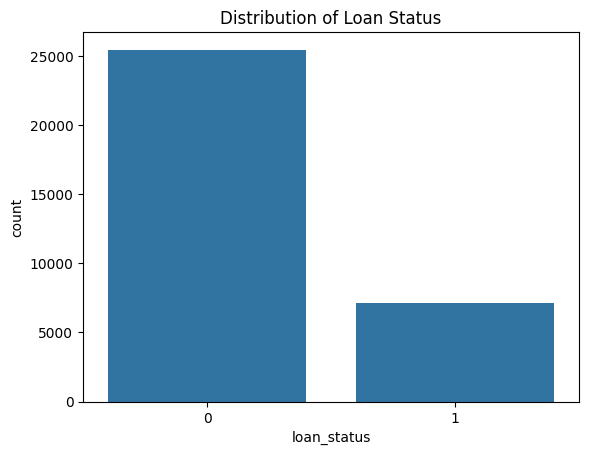

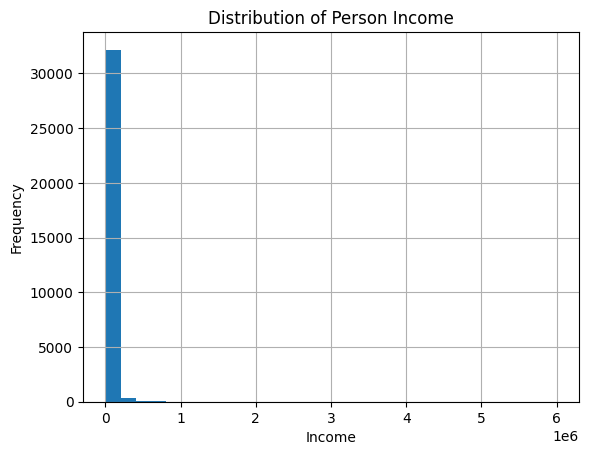

In [ ]:

# Distribution of 'loan_status'
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

# Histogram of 'person_income'
data['person_income'].hist(bins=30)
plt.title('Distribution of Person Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Bivariate Analysis

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

In [ ]:
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

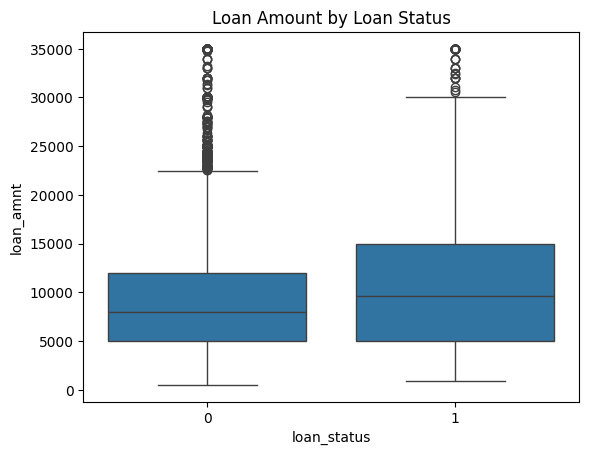

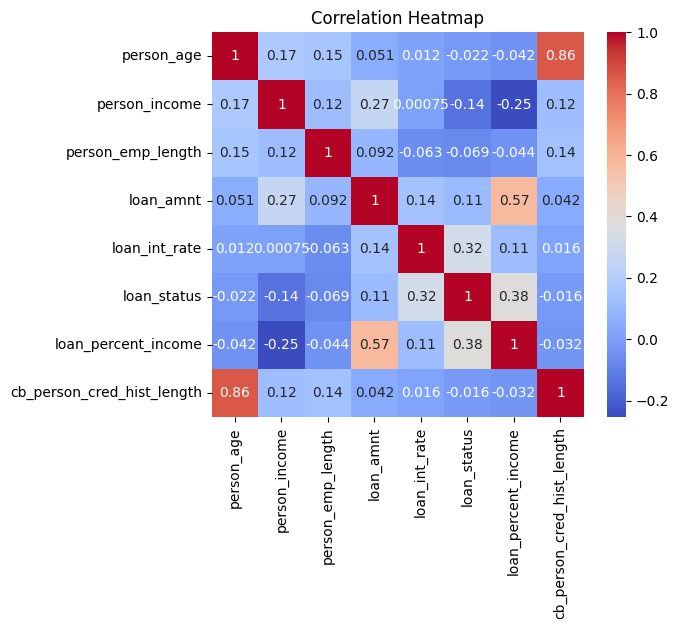

In [ ]:
# Boxplot of 'loan_amnt' by 'loan_status'
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount by Loan Status')
plt.show()

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Multivariate Analysis

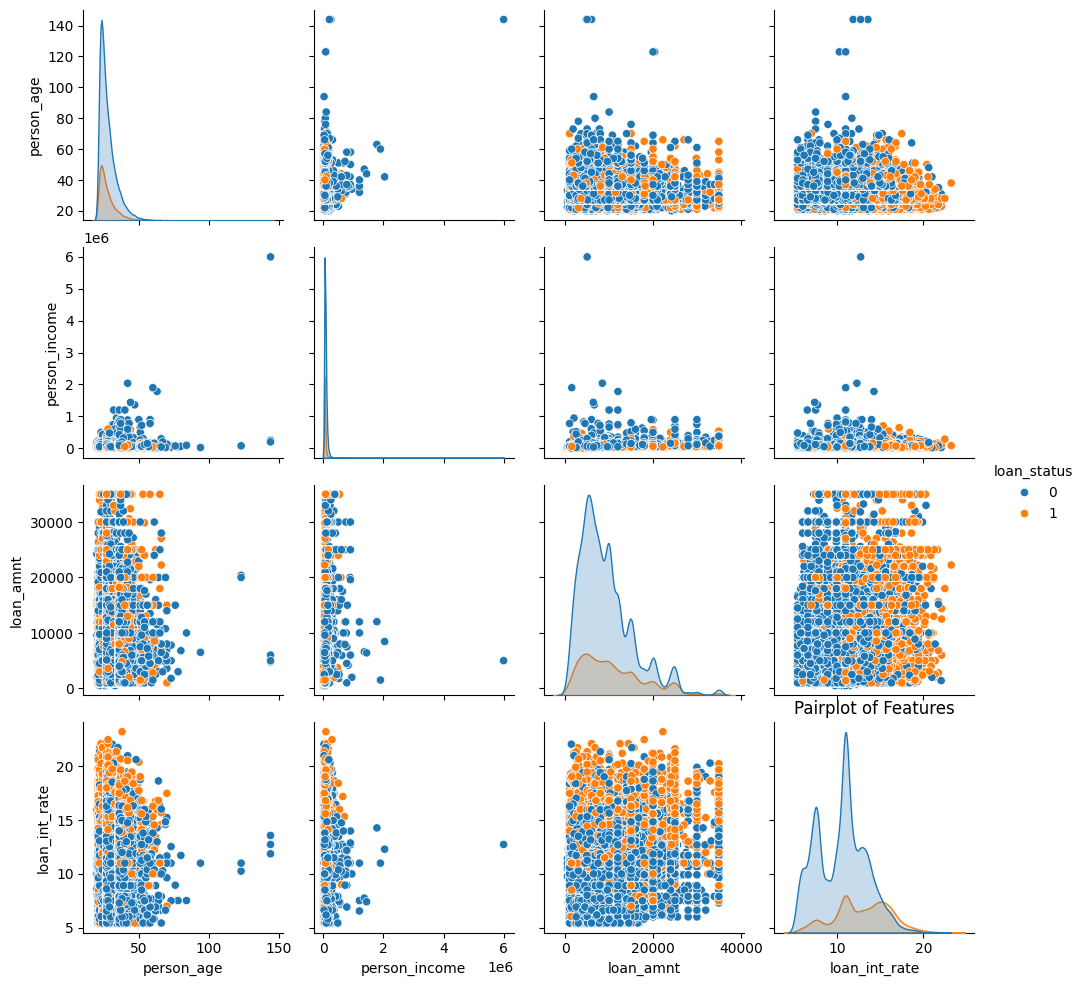

In [ ]:
# Pairplot
sns.pairplot(data[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_status']], hue='loan_status')
plt.title('Pairplot of Features')
plt.show()


**Feature Engineering**

In [ ]:
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']


**Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training and Hyperparameter Tuning**

*Gradient Boosting*

In [ ]:
# Define the model
gb_model = GradientBoostingClassifier()

# Define hyperparameters for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}

# Perform GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
gb_best_model = grid_search_gb.best_estimator_


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}


*Random Forest*

In [ ]:
# Define the model
rf_model = RandomForestClassifier()

# Define hyperparameters for GridSearch
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
rf_best_model = grid_search_rf.best_estimator_

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


**Model Evaluation**

*Evaluate Gradient Boosting*

In [ ]:
# Predict on test set
y_pred_gb = gb_best_model.predict(X_test)

# Evaluation metrics
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_gb))

Gradient Boosting Performance:
Accuracy: 0.926653368114163
Precision: 0.9415525114155251
Recall: 0.7134948096885814
F1 Score: 0.8118110236220473
AUC-ROC: 0.8504382565793065


*Evaluate Random Forest*

In [ ]:
# Predict on test set
y_pred_rf = rf_best_model.predict(X_test)

# Evaluation metrics
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.9295688200092067
Precision: 0.9522935779816514
Recall: 0.7183391003460208
F1 Score: 0.8189349112426036
AUC-ROC: 0.8540433672077106
